In [1]:
%matplotlib inline

In [2]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
from glob import glob
import tables as tb

In [3]:
from models import *

In [4]:
datapath = 'data/train/AOI_3_Paris_Train'
MODEL_NAME = 'v5'
ORIGINAL_SIZE = 650
INPUT_SIZE = 256

BASE_TRAIN_DIR = "data/train"
WORKING_DIR = "data/working"
IMAGE_DIR = "data/working/images/v5"

# Input files
FMT_TRAIN_SUMMARY_PATH = str(
    Path(BASE_TRAIN_DIR) /
    Path("{prefix:s}_Train/") /
    Path("summaryData/{prefix:s}_Train_Building_Solutions.csv"))
FMT_TRAIN_RGB_IMAGE_PATH = str(
    Path("{datapath:s}/") /
    Path("RGB-PanSharpen/RGB-PanSharpen_{image_id:s}.tif"))
FMT_TEST_RGB_IMAGE_PATH = str(
    Path("{datapath:s}/") /
    Path("RGB-PanSharpen/RGB-PanSharpen_{image_id:s}.tif"))
FMT_TRAIN_MSPEC_IMAGE_PATH = str(
    Path("{datapath:s}/") /
    Path("MUL-PanSharpen/MUL-PanSharpen_{image_id:s}.tif"))
FMT_TEST_MSPEC_IMAGE_PATH = str(
    Path("{datapath:s}/") /
    Path("MUL-PanSharpen/MUL-PanSharpen_{image_id:s}.tif"))

# Preprocessing result
FMT_RGB_BANDCUT_TH_PATH = IMAGE_DIR + "/rgb_bandcut{}.csv"
FMT_MUL_BANDCUT_TH_PATH = IMAGE_DIR + "/mul_bandcut{}.csv"

# Image list, Image container and mask container
FMT_VALTRAIN_IMAGELIST_PATH = IMAGE_DIR + "/{prefix:s}_valtrain_ImageId.csv"
FMT_VALTRAIN_MASK_STORE = IMAGE_DIR + "/valtrain_{}_mask.h5"
FMT_VALTRAIN_IM_STORE = IMAGE_DIR + "/valtrain_{}_im.h5"
FMT_VALTRAIN_MUL_STORE = IMAGE_DIR + "/valtrain_{}_mul.h5"

FMT_VALTEST_IMAGELIST_PATH = IMAGE_DIR + "/{prefix:s}_valtest_ImageId.csv"
FMT_VALTEST_MASK_STORE = IMAGE_DIR + "/valtest_{}_mask.h5"
FMT_VALTEST_IM_STORE = IMAGE_DIR + "/valtest_{}_im.h5"
FMT_VALTEST_MUL_STORE = IMAGE_DIR + "/valtest_{}_mul.h5"

FMT_IMMEAN = IMAGE_DIR + "/{}_immean.h5"
FMT_MULMEAN = IMAGE_DIR + "/{}_mulmean.h5"

FMT_TEST_IMAGELIST_PATH = IMAGE_DIR + "/{prefix:s}_test_ImageId.csv"
FMT_TEST_IM_STORE = IMAGE_DIR + "/test_{}_im.h5"
FMT_TEST_MUL_STORE = IMAGE_DIR + "/test_{}_mul.h5"

File reference:

ywywywx@fastai-dl:/data/working/images/v5$ ls
```AOI_3_Paris_immean.h5             valtest_AOI_3_Paris_im.h5
AOI_3_Paris_valtest_ImageId.csv   valtest_AOI_3_Paris_mask.h5
AOI_3_Paris_valtrain_ImageId.csv  valtrain_AOI_3_Paris_im.h5
rgb_bandcutAOI_3_Paris.csv        valtrain_AOI_3_Paris_mask.h5```

## Risky experiment: making data accords to fastai api and train with the library

Using transformations from the solution of kaggle planet challenge https://github.com/fastai/fastai/blob/master/courses/dl1/planet.py

In [5]:
sz = 256
# batch size = 30: GPU memory usage: 9751MiB / 11441MiB
bs = 30

h5 images are less than 1GB, so probably fits in memory.

But for compatibility, write h5 images to disk

In [6]:
valtrain_X_path = Path(IMAGE_DIR) / Path('valtrain_AOI_3_Paris_im.h5')
valtrain_y_path = Path(IMAGE_DIR) / Path('valtrain_AOI_3_Paris_mask.h5')

valtest_X_path = Path(IMAGE_DIR) / Path('valtest_AOI_3_Paris_im.h5')
valtest_y_path = Path(IMAGE_DIR) / Path('valtest_AOI_3_Paris_mask.h5')

paths = [valtrain_X_path, valtrain_y_path, valtest_X_path, valtest_y_path]

In [7]:
def open_h5(path):
    with tb.open_file(str(path), 'r') as f:
        ls = list(f.root)
        return zip(np.array([node.name for node in ls]), np.array(ls))

In [22]:
# Preprocessing: save h5 to images
for path in paths:
    h5_file = open_h5(str(path))
    for img in h5_file:
        if 'im.h5' in str(path):
            img_name = IMAGE_DIR + '/256/' + img[0] + '.jpg'
        else:
            img_name = IMAGE_DIR + '/256/' + img[0] + '.png'
        
#         print(img_name)
        plt.imsave(img_name, img[1])

data/working/images/v5/256/AOI_3_Paris_img100.jpg
data/working/images/v5/256/AOI_3_Paris_img1000.jpg
data/working/images/v5/256/AOI_3_Paris_img1001.jpg
data/working/images/v5/256/AOI_3_Paris_img101.jpg
data/working/images/v5/256/AOI_3_Paris_img1011.jpg
data/working/images/v5/256/AOI_3_Paris_img1016.jpg
data/working/images/v5/256/AOI_3_Paris_img1017.jpg
data/working/images/v5/256/AOI_3_Paris_img1018.jpg
data/working/images/v5/256/AOI_3_Paris_img102.jpg
data/working/images/v5/256/AOI_3_Paris_img1021.jpg
data/working/images/v5/256/AOI_3_Paris_img1022.jpg
data/working/images/v5/256/AOI_3_Paris_img1025.jpg
data/working/images/v5/256/AOI_3_Paris_img1027.jpg
data/working/images/v5/256/AOI_3_Paris_img1028.jpg
data/working/images/v5/256/AOI_3_Paris_img1029.jpg
data/working/images/v5/256/AOI_3_Paris_img1032.jpg
data/working/images/v5/256/AOI_3_Paris_img1035.jpg
data/working/images/v5/256/AOI_3_Paris_img1036.jpg
data/working/images/v5/256/AOI_3_Paris_img1038.jpg
data/working/images/v5/256/AOI_3_P

data/working/images/v5/256/AOI_3_Paris_img1350.jpg
data/working/images/v5/256/AOI_3_Paris_img1352.jpg
data/working/images/v5/256/AOI_3_Paris_img1354.jpg
data/working/images/v5/256/AOI_3_Paris_img1357.jpg
data/working/images/v5/256/AOI_3_Paris_img1359.jpg
data/working/images/v5/256/AOI_3_Paris_img136.jpg
data/working/images/v5/256/AOI_3_Paris_img1360.jpg
data/working/images/v5/256/AOI_3_Paris_img1362.jpg
data/working/images/v5/256/AOI_3_Paris_img1368.jpg
data/working/images/v5/256/AOI_3_Paris_img137.jpg
data/working/images/v5/256/AOI_3_Paris_img1371.jpg
data/working/images/v5/256/AOI_3_Paris_img1373.jpg
data/working/images/v5/256/AOI_3_Paris_img1379.jpg
data/working/images/v5/256/AOI_3_Paris_img1383.jpg
data/working/images/v5/256/AOI_3_Paris_img1388.jpg
data/working/images/v5/256/AOI_3_Paris_img1389.jpg
data/working/images/v5/256/AOI_3_Paris_img139.jpg
data/working/images/v5/256/AOI_3_Paris_img1391.jpg
data/working/images/v5/256/AOI_3_Paris_img1392.jpg
data/working/images/v5/256/AOI_3_P

data/working/images/v5/256/AOI_3_Paris_img173.jpg
data/working/images/v5/256/AOI_3_Paris_img1730.jpg
data/working/images/v5/256/AOI_3_Paris_img1733.jpg
data/working/images/v5/256/AOI_3_Paris_img1735.jpg
data/working/images/v5/256/AOI_3_Paris_img174.jpg
data/working/images/v5/256/AOI_3_Paris_img1740.jpg
data/working/images/v5/256/AOI_3_Paris_img1741.jpg
data/working/images/v5/256/AOI_3_Paris_img1742.jpg
data/working/images/v5/256/AOI_3_Paris_img1743.jpg
data/working/images/v5/256/AOI_3_Paris_img1746.jpg
data/working/images/v5/256/AOI_3_Paris_img1747.jpg
data/working/images/v5/256/AOI_3_Paris_img1748.jpg
data/working/images/v5/256/AOI_3_Paris_img1749.jpg
data/working/images/v5/256/AOI_3_Paris_img1750.jpg
data/working/images/v5/256/AOI_3_Paris_img1754.jpg
data/working/images/v5/256/AOI_3_Paris_img1760.jpg
data/working/images/v5/256/AOI_3_Paris_img1763.jpg
data/working/images/v5/256/AOI_3_Paris_img1767.jpg
data/working/images/v5/256/AOI_3_Paris_img1768.jpg
data/working/images/v5/256/AOI_3_

data/working/images/v5/256/AOI_3_Paris_img393.jpg
data/working/images/v5/256/AOI_3_Paris_img395.jpg
data/working/images/v5/256/AOI_3_Paris_img396.jpg
data/working/images/v5/256/AOI_3_Paris_img4.jpg
data/working/images/v5/256/AOI_3_Paris_img40.jpg
data/working/images/v5/256/AOI_3_Paris_img403.jpg
data/working/images/v5/256/AOI_3_Paris_img407.jpg
data/working/images/v5/256/AOI_3_Paris_img408.jpg
data/working/images/v5/256/AOI_3_Paris_img410.jpg
data/working/images/v5/256/AOI_3_Paris_img411.jpg
data/working/images/v5/256/AOI_3_Paris_img412.jpg
data/working/images/v5/256/AOI_3_Paris_img416.jpg
data/working/images/v5/256/AOI_3_Paris_img418.jpg
data/working/images/v5/256/AOI_3_Paris_img423.jpg
data/working/images/v5/256/AOI_3_Paris_img427.jpg
data/working/images/v5/256/AOI_3_Paris_img429.jpg
data/working/images/v5/256/AOI_3_Paris_img43.jpg
data/working/images/v5/256/AOI_3_Paris_img431.jpg
data/working/images/v5/256/AOI_3_Paris_img434.jpg
data/working/images/v5/256/AOI_3_Paris_img435.jpg
data

data/working/images/v5/256/AOI_3_Paris_img735.jpg
data/working/images/v5/256/AOI_3_Paris_img736.jpg
data/working/images/v5/256/AOI_3_Paris_img738.jpg
data/working/images/v5/256/AOI_3_Paris_img74.jpg
data/working/images/v5/256/AOI_3_Paris_img741.jpg
data/working/images/v5/256/AOI_3_Paris_img746.jpg
data/working/images/v5/256/AOI_3_Paris_img748.jpg
data/working/images/v5/256/AOI_3_Paris_img749.jpg
data/working/images/v5/256/AOI_3_Paris_img750.jpg
data/working/images/v5/256/AOI_3_Paris_img751.jpg
data/working/images/v5/256/AOI_3_Paris_img755.jpg
data/working/images/v5/256/AOI_3_Paris_img760.jpg
data/working/images/v5/256/AOI_3_Paris_img774.jpg
data/working/images/v5/256/AOI_3_Paris_img775.jpg
data/working/images/v5/256/AOI_3_Paris_img778.jpg
data/working/images/v5/256/AOI_3_Paris_img78.jpg
data/working/images/v5/256/AOI_3_Paris_img781.jpg
data/working/images/v5/256/AOI_3_Paris_img783.jpg
data/working/images/v5/256/AOI_3_Paris_img786.jpg
data/working/images/v5/256/AOI_3_Paris_img788.jpg
da

data/working/images/v5/256/AOI_3_Paris_img1103.png
data/working/images/v5/256/AOI_3_Paris_img1104.png
data/working/images/v5/256/AOI_3_Paris_img1108.png
data/working/images/v5/256/AOI_3_Paris_img1109.png
data/working/images/v5/256/AOI_3_Paris_img111.png
data/working/images/v5/256/AOI_3_Paris_img1112.png
data/working/images/v5/256/AOI_3_Paris_img1113.png
data/working/images/v5/256/AOI_3_Paris_img1117.png
data/working/images/v5/256/AOI_3_Paris_img1121.png
data/working/images/v5/256/AOI_3_Paris_img1122.png
data/working/images/v5/256/AOI_3_Paris_img1123.png
data/working/images/v5/256/AOI_3_Paris_img1124.png
data/working/images/v5/256/AOI_3_Paris_img1125.png
data/working/images/v5/256/AOI_3_Paris_img1127.png
data/working/images/v5/256/AOI_3_Paris_img1129.png
data/working/images/v5/256/AOI_3_Paris_img1130.png
data/working/images/v5/256/AOI_3_Paris_img1132.png
data/working/images/v5/256/AOI_3_Paris_img1136.png
data/working/images/v5/256/AOI_3_Paris_img1140.png
data/working/images/v5/256/AOI_3

data/working/images/v5/256/AOI_3_Paris_img1480.png
data/working/images/v5/256/AOI_3_Paris_img1484.png
data/working/images/v5/256/AOI_3_Paris_img1485.png
data/working/images/v5/256/AOI_3_Paris_img1486.png
data/working/images/v5/256/AOI_3_Paris_img1488.png
data/working/images/v5/256/AOI_3_Paris_img1489.png
data/working/images/v5/256/AOI_3_Paris_img1491.png
data/working/images/v5/256/AOI_3_Paris_img1492.png
data/working/images/v5/256/AOI_3_Paris_img1495.png
data/working/images/v5/256/AOI_3_Paris_img1496.png
data/working/images/v5/256/AOI_3_Paris_img1506.png
data/working/images/v5/256/AOI_3_Paris_img1509.png
data/working/images/v5/256/AOI_3_Paris_img151.png
data/working/images/v5/256/AOI_3_Paris_img1517.png
data/working/images/v5/256/AOI_3_Paris_img1523.png
data/working/images/v5/256/AOI_3_Paris_img1526.png
data/working/images/v5/256/AOI_3_Paris_img1527.png
data/working/images/v5/256/AOI_3_Paris_img1528.png
data/working/images/v5/256/AOI_3_Paris_img1530.png
data/working/images/v5/256/AOI_3

data/working/images/v5/256/AOI_3_Paris_img1857.png
data/working/images/v5/256/AOI_3_Paris_img1859.png
data/working/images/v5/256/AOI_3_Paris_img186.png
data/working/images/v5/256/AOI_3_Paris_img1860.png
data/working/images/v5/256/AOI_3_Paris_img1865.png
data/working/images/v5/256/AOI_3_Paris_img1867.png
data/working/images/v5/256/AOI_3_Paris_img1878.png
data/working/images/v5/256/AOI_3_Paris_img1879.png
data/working/images/v5/256/AOI_3_Paris_img188.png
data/working/images/v5/256/AOI_3_Paris_img1881.png
data/working/images/v5/256/AOI_3_Paris_img1883.png
data/working/images/v5/256/AOI_3_Paris_img1889.png
data/working/images/v5/256/AOI_3_Paris_img1893.png
data/working/images/v5/256/AOI_3_Paris_img1898.png
data/working/images/v5/256/AOI_3_Paris_img19.png
data/working/images/v5/256/AOI_3_Paris_img1902.png
data/working/images/v5/256/AOI_3_Paris_img1907.png
data/working/images/v5/256/AOI_3_Paris_img1908.png
data/working/images/v5/256/AOI_3_Paris_img1909.png
data/working/images/v5/256/AOI_3_Pa

data/working/images/v5/256/AOI_3_Paris_img511.png
data/working/images/v5/256/AOI_3_Paris_img513.png
data/working/images/v5/256/AOI_3_Paris_img514.png
data/working/images/v5/256/AOI_3_Paris_img516.png
data/working/images/v5/256/AOI_3_Paris_img517.png
data/working/images/v5/256/AOI_3_Paris_img518.png
data/working/images/v5/256/AOI_3_Paris_img519.png
data/working/images/v5/256/AOI_3_Paris_img52.png
data/working/images/v5/256/AOI_3_Paris_img527.png
data/working/images/v5/256/AOI_3_Paris_img530.png
data/working/images/v5/256/AOI_3_Paris_img533.png
data/working/images/v5/256/AOI_3_Paris_img534.png
data/working/images/v5/256/AOI_3_Paris_img535.png
data/working/images/v5/256/AOI_3_Paris_img536.png
data/working/images/v5/256/AOI_3_Paris_img537.png
data/working/images/v5/256/AOI_3_Paris_img542.png
data/working/images/v5/256/AOI_3_Paris_img543.png
data/working/images/v5/256/AOI_3_Paris_img544.png
data/working/images/v5/256/AOI_3_Paris_img545.png
data/working/images/v5/256/AOI_3_Paris_img546.png
d

data/working/images/v5/256/AOI_3_Paris_img894.png
data/working/images/v5/256/AOI_3_Paris_img895.png
data/working/images/v5/256/AOI_3_Paris_img896.png
data/working/images/v5/256/AOI_3_Paris_img897.png
data/working/images/v5/256/AOI_3_Paris_img898.png
data/working/images/v5/256/AOI_3_Paris_img90.png
data/working/images/v5/256/AOI_3_Paris_img901.png
data/working/images/v5/256/AOI_3_Paris_img903.png
data/working/images/v5/256/AOI_3_Paris_img904.png
data/working/images/v5/256/AOI_3_Paris_img905.png
data/working/images/v5/256/AOI_3_Paris_img907.png
data/working/images/v5/256/AOI_3_Paris_img909.png
data/working/images/v5/256/AOI_3_Paris_img914.png
data/working/images/v5/256/AOI_3_Paris_img918.png
data/working/images/v5/256/AOI_3_Paris_img925.png
data/working/images/v5/256/AOI_3_Paris_img926.png
data/working/images/v5/256/AOI_3_Paris_img930.png
data/working/images/v5/256/AOI_3_Paris_img931.png
data/working/images/v5/256/AOI_3_Paris_img932.png
data/working/images/v5/256/AOI_3_Paris_img933.png
d

data/working/images/v5/256/AOI_3_Paris_img156.jpg
data/working/images/v5/256/AOI_3_Paris_img1560.jpg
data/working/images/v5/256/AOI_3_Paris_img1562.jpg
data/working/images/v5/256/AOI_3_Paris_img1566.jpg
data/working/images/v5/256/AOI_3_Paris_img157.jpg
data/working/images/v5/256/AOI_3_Paris_img1583.jpg
data/working/images/v5/256/AOI_3_Paris_img1585.jpg
data/working/images/v5/256/AOI_3_Paris_img1586.jpg
data/working/images/v5/256/AOI_3_Paris_img1595.jpg
data/working/images/v5/256/AOI_3_Paris_img1599.jpg
data/working/images/v5/256/AOI_3_Paris_img1610.jpg
data/working/images/v5/256/AOI_3_Paris_img1622.jpg
data/working/images/v5/256/AOI_3_Paris_img1623.jpg
data/working/images/v5/256/AOI_3_Paris_img1627.jpg
data/working/images/v5/256/AOI_3_Paris_img163.jpg
data/working/images/v5/256/AOI_3_Paris_img1630.jpg
data/working/images/v5/256/AOI_3_Paris_img1632.jpg
data/working/images/v5/256/AOI_3_Paris_img1633.jpg
data/working/images/v5/256/AOI_3_Paris_img1648.jpg
data/working/images/v5/256/AOI_3_P

data/working/images/v5/256/AOI_3_Paris_img743.jpg
data/working/images/v5/256/AOI_3_Paris_img747.jpg
data/working/images/v5/256/AOI_3_Paris_img75.jpg
data/working/images/v5/256/AOI_3_Paris_img757.jpg
data/working/images/v5/256/AOI_3_Paris_img765.jpg
data/working/images/v5/256/AOI_3_Paris_img766.jpg
data/working/images/v5/256/AOI_3_Paris_img767.jpg
data/working/images/v5/256/AOI_3_Paris_img768.jpg
data/working/images/v5/256/AOI_3_Paris_img773.jpg
data/working/images/v5/256/AOI_3_Paris_img780.jpg
data/working/images/v5/256/AOI_3_Paris_img785.jpg
data/working/images/v5/256/AOI_3_Paris_img789.jpg
data/working/images/v5/256/AOI_3_Paris_img794.jpg
data/working/images/v5/256/AOI_3_Paris_img804.jpg
data/working/images/v5/256/AOI_3_Paris_img807.jpg
data/working/images/v5/256/AOI_3_Paris_img813.jpg
data/working/images/v5/256/AOI_3_Paris_img819.jpg
data/working/images/v5/256/AOI_3_Paris_img822.jpg
data/working/images/v5/256/AOI_3_Paris_img827.jpg
data/working/images/v5/256/AOI_3_Paris_img832.jpg
d

data/working/images/v5/256/AOI_3_Paris_img1547.png
data/working/images/v5/256/AOI_3_Paris_img155.png
data/working/images/v5/256/AOI_3_Paris_img1556.png
data/working/images/v5/256/AOI_3_Paris_img156.png
data/working/images/v5/256/AOI_3_Paris_img1560.png
data/working/images/v5/256/AOI_3_Paris_img1562.png
data/working/images/v5/256/AOI_3_Paris_img1566.png
data/working/images/v5/256/AOI_3_Paris_img157.png
data/working/images/v5/256/AOI_3_Paris_img1583.png
data/working/images/v5/256/AOI_3_Paris_img1585.png
data/working/images/v5/256/AOI_3_Paris_img1586.png
data/working/images/v5/256/AOI_3_Paris_img1595.png
data/working/images/v5/256/AOI_3_Paris_img1599.png
data/working/images/v5/256/AOI_3_Paris_img1610.png
data/working/images/v5/256/AOI_3_Paris_img1622.png
data/working/images/v5/256/AOI_3_Paris_img1623.png
data/working/images/v5/256/AOI_3_Paris_img1627.png
data/working/images/v5/256/AOI_3_Paris_img163.png
data/working/images/v5/256/AOI_3_Paris_img1630.png
data/working/images/v5/256/AOI_3_Pa

data/working/images/v5/256/AOI_3_Paris_img766.png
data/working/images/v5/256/AOI_3_Paris_img767.png
data/working/images/v5/256/AOI_3_Paris_img768.png
data/working/images/v5/256/AOI_3_Paris_img773.png
data/working/images/v5/256/AOI_3_Paris_img780.png
data/working/images/v5/256/AOI_3_Paris_img785.png
data/working/images/v5/256/AOI_3_Paris_img789.png
data/working/images/v5/256/AOI_3_Paris_img794.png
data/working/images/v5/256/AOI_3_Paris_img804.png
data/working/images/v5/256/AOI_3_Paris_img807.png
data/working/images/v5/256/AOI_3_Paris_img813.png
data/working/images/v5/256/AOI_3_Paris_img819.png
data/working/images/v5/256/AOI_3_Paris_img822.png
data/working/images/v5/256/AOI_3_Paris_img827.png
data/working/images/v5/256/AOI_3_Paris_img832.png
data/working/images/v5/256/AOI_3_Paris_img838.png
data/working/images/v5/256/AOI_3_Paris_img839.png
data/working/images/v5/256/AOI_3_Paris_img841.png
data/working/images/v5/256/AOI_3_Paris_img843.png
data/working/images/v5/256/AOI_3_Paris_img845.png


In [23]:
class MatchedFilesDataset(FilesDataset):
    def __init__(self, fnames, y, transform, path):
        self.y=y
        assert(len(fnames)==len(y))
        super().__init__(fnames, transform, path)
    def get_y(self, i): return open_image(os.path.join(self.path, self.y[i]))
    def get_c(self): return 0

In [24]:
x_names = np.array(glob(IMAGE_DIR + '/256/*.jpg')); x_names.sort()
y_names = np.array(glob(IMAGE_DIR + '/256/*.png')); y_names.sort()

In [25]:
next(zip(x_names, y_names))

('data/working/images/v5/256/AOI_3_Paris_img10.jpg',
 'data/working/images/v5/256/AOI_3_Paris_img10.png')

In [26]:
# 80:20 split
val_idxs = np.random.permutation(range(230)) 
((val_x,trn_x),(val_y,trn_y)) = split_by_idx(val_idxs, x_names, y_names)

In [27]:
next(zip(trn_x, trn_y))

('data/working/images/v5/256/AOI_3_Paris_img1330.jpg',
 'data/working/images/v5/256/AOI_3_Paris_img1330.png')

In [28]:
PATH = ''

In [29]:
aug_tfms = [RandomRotateZoom(9, 0.18, 0.1, tfm_y=TfmType.CLASS), RandomLighting(0.05, 0.1, tfm_y=TfmType.CLASS), RandomDihedral(tfm_y=TfmType.CLASS)]

# aug_tfms=transforms_top_down

# which standard to use, resnet34 or VGG16?
tfms = tfms_from_model(vgg16, sz, crop_type=CropType.NO, tfm_y=TfmType.CLASS, aug_tfms=aug_tfms)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH)
md = ImageData('', datasets, bs, num_workers=8, classes=None)
denorm = md.trn_ds.denorm

In [38]:
y = md.trn_ds.get_y(0)

In [57]:
np.average(y[:,:,1])

0.010458913

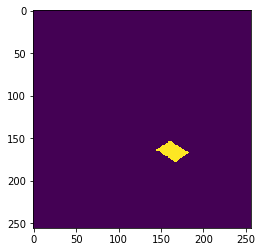

In [58]:
plt.imshow(y[:,:,1])

In [59]:
x, y = md.trn_dl.get_batch([0])
print(x.shape, y.shape)

(1, 3, 256, 256) (1, 256, 256)


In [33]:
denorm(x).shape

(1, 256, 256, 3)

In [34]:
batch = md.trn_dl.get_batch([20])

In [35]:
x = batch[0]
y = batch[1]

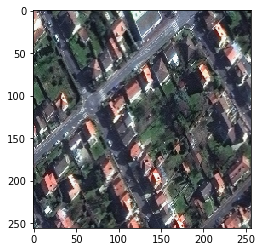

In [39]:
plt.imshow(denorm(batch[0]).squeeze())

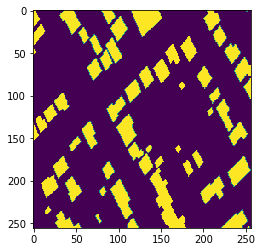

In [40]:
plt.imshow(y.squeeze())

## Preparing model

Pretrained UNet model taken from https://github.com/ternaus/robot-surgery-segmentation

In [12]:
net = UNet16(pretrained='vgg'); net

UNet16(
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
  

In [13]:
cut_base = 8

In [25]:
list(children(net))[7]

Sequential(
  (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU(inplace)
)

In [14]:
class UpsampleModel():
    def __init__(self,model,name='upsample'):
        self.model,self.name = model,name

    def get_layer_groups(self, precompute):
        c = list(children(self.model))
        return [c[:cut_base],
               c[cut_base:]]

In [15]:
models = UpsampleModel(to_gpu(net))

TODO: Use official evaluation utility https://github.com/SpaceNetChallenge/utilities.git

In [17]:
def dice(pred, targs):
    m1 = (pred[:,0]>0).float()
    m2 = targs
    return 2. * (m1*m2).sum() / (m1+m2).sum()
def mask_loss(pred,targ):
#     print(pred.shape, targ.shape)
    return F.binary_cross_entropy_with_logits(pred[:,0],targ)

def mask_acc(pred,targ): return accuracy_multi(pred[:,0], targ, 0.)

In [18]:
learn = ConvLearner(md, models)
learn.opt_fn=optim.Adam
learn.crit=mask_loss
learn.metrics=[mask_acc,dice]

#### Freeze pretrained VGG weights and train UNet

In [19]:
learn.freeze_to(1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   dice           
    0      0.726805   0.683323   0.0        0.0       



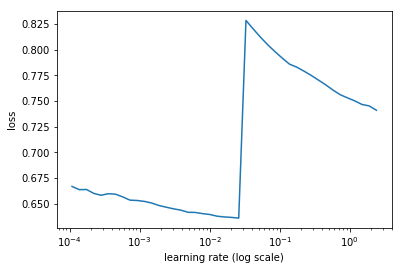

In [31]:
learn.lr_find()
learn.sched.plot()

In [22]:
lr = 1e-3

In [21]:
learn.fit(lr, 1, cycle_len=5, use_clr=(20,5))

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   dice           
    0      0.615051   0.601596   0.0        0.268465  
    1      0.601869   0.591291   0.0        0.278533       
    2      0.59357    0.586758   0.0        0.325265       
    3      0.588804   0.5859     0.0        0.315894       
    4      0.586024   0.584502   0.0        0.33291        



[0.58450174, 0.0, 0.33290954570467735]

In [25]:
learn.save('freeze_to_1_1')

In [22]:
lr = 1e-3

In [43]:
batch = md.val_dl.get_batch([1])

In [44]:
x = batch[0]
y = batch[1]

In [45]:
x.shape

(1, 3, 256, 256)

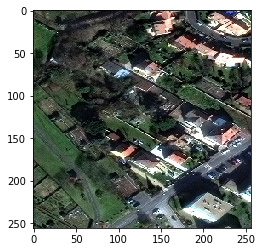

In [46]:
plt.imshow(denorm(x).squeeze())

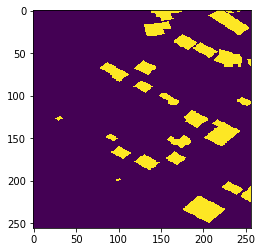

In [47]:
plt.imshow(y.squeeze())

In [52]:
pred = net(Variable(torch.cuda.FloatTensor(x)))

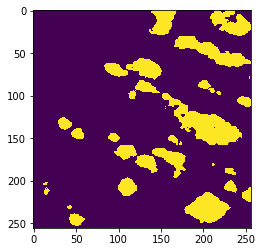

In [58]:
plt.imshow(to_np(pred>0).squeeze())

### Making progress

#### Unfreeze and fine-tune pretraind VGG weight with lower learning rate

In [61]:
learn.unfreeze()
learn.bn_freeze(True)
lrs = np.array([lr/100,lr])/2

In [62]:
learn.fit(lrs,1,cycle_len=8,use_clr=(20,8))

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   dice           
    0      0.581537   0.584417   0.0        0.336344  
    1      0.580961   0.583709   0.0        0.331328       
    2      0.580325   0.582609   0.0        0.324763       
    3      0.580138   0.582528   0.0        0.318581       
    4      0.579728   0.581724   0.0        0.318384      
    5      0.580101   0.581239   0.0        0.331164      
    6      0.579792   0.581153   0.0        0.327957      
    7      0.57981    0.581154   0.0        0.328384      



[0.5811535, 0.0, 0.3283839526793545]

In [64]:
learn.save('unfreezed_1_1')

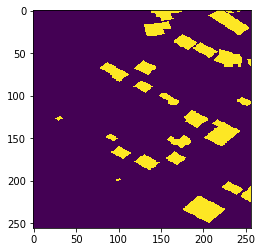

In [65]:
plt.imshow(y.squeeze())

In [66]:
pred = net(Variable(torch.cuda.FloatTensor(x)))

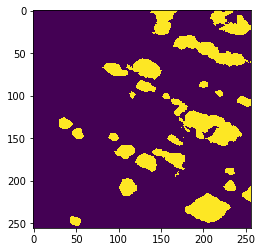

In [67]:
plt.imshow(to_np(pred>0).squeeze())

In [70]:
lrs = np.array([lr/100,lr])/2

In [71]:
learn.fit(lrs,1,cycle_len=8,use_clr=(10,8))

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   dice           
    0      0.57958    0.581212   0.0        0.326939  
    1      0.578068   0.580498   0.0        0.329558       
    2      0.578586   0.580313   0.0        0.335122       
    3      0.578243   0.580144   0.0        0.322855       
    4      0.577614   0.580067   0.0        0.333062       
    5      0.57799    0.579899   0.0        0.32785        
    6      0.577415   0.579819   0.0        0.323526       
    7      0.576131   0.579726   0.0        0.324858       



[0.5797255, 0.0, 0.3248582846869269]

In [72]:
learn.save('unfreezed_1_2')

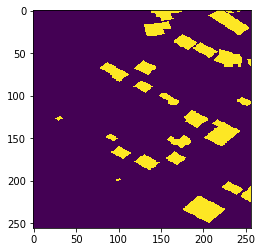

In [73]:
plt.imshow(y.squeeze())

In [74]:
pred = net(Variable(torch.cuda.FloatTensor(x)))

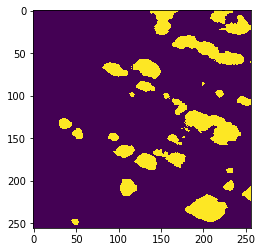

In [75]:
plt.imshow(to_np(pred>0).squeeze())

### Now leave it traning for 4 epochs and go grab some food

In [76]:
learn.fit(lrs,4,cycle_len=8,use_clr=(10,8))

HBox(children=(IntProgress(value=0, description='Epoch', max=32), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   dice           
    0      0.577601   0.579183   0.0        0.331533  
    1      0.576111   0.579943   0.0        0.338275       
    2      0.575984   0.57984    0.0        0.32118        
    3      0.576301   0.579763   0.0        0.333504       
    4      0.576575   0.578827   0.0        0.323104       
    5      0.575988   0.579132   0.0        0.328271       
    6      0.575235   0.578968   0.0        0.327581       
    7      0.575887   0.578744   0.0        0.329245       
    8      0.57606    0.578398   0.0        0.326493       
    9      0.57589    0.577836   0.0        0.330557       
    10     0.576181   0.578512   0.0        0.330189       
    11     0.575765   0.578177   0.0        0.326379       
    12     0.576305   0.577897   0.0        0.322384       
    13     0.575066   0.578213   0.0        0.335989       
    14     0.574639   0.578127   0.0        0.327665       
    15     0.573754   0.578007   0.0        0

KeyboardInterrupt: 

Overfitting. Abord.

In [77]:
learn.save('unfreezed_1_3')

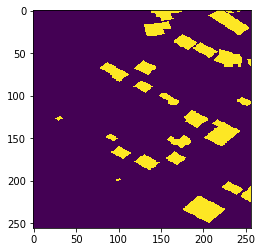

In [78]:
plt.imshow(y.squeeze())

In [79]:
pred = net(Variable(torch.cuda.FloatTensor(x)))

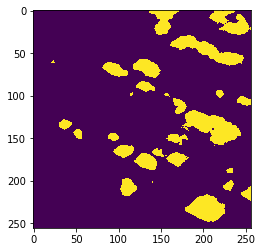

In [80]:
plt.imshow(to_np(pred>0).squeeze())

### TODO:
preprocessing:
- compress high light instead of clipping?
- scrap Openstreetmap and stack layers

Training:
- try mask r-cnn?
- show the most incorrect predictions
- train on merged dataset
- train on larger images
- train on multi-channel images
